In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
cre_dataset = pd.read_csv('../datasets/cre_dataset.csv')
cre_dataset

,name,uniprot_acc,species,references,module,start_aa,end_aa,dataset,id_cre
0,DNMT1,P13864,M. musculus,"(Song et al., 2011; Trudeau et al., 2013)",d,699,733,train,1
1,TBP,P20226,H. sapiens,"(Kuddus and Schmidt, 1993; Trudeau et al., 2013)",d,1,55,train,2
2,TAK1,Q62073,M. musculus,"(Yamaguchi et al., 1995)",d,1,22,train,3
3,SNF1,P06782,S. crevisiae,"(Jiang and Carlson, 1997; Trudeau et al., 2013)",d,392,495,train,4
4,TSE1,P10644,H. sapiens,"(Francis et al., 2002)",d,1,98,train,5
...,...,...,...,...,...,...,...,...,...
163,NLRC4,Q3UP24,M. musculus,"(Hu et al., 2013)",s,299,355,test,164
164,Park2,Q9JK66,R. norvegicus,"(Byrd and Weissman, 2013)",s,410,465,test,165
165,EB1,Q15691,H. sapiens,"(Kanaba et al., 2013)",s,189,268,test,166
166,gp47,P04521,Enterobacteria phage T4,"(Gao and Nelson, 2014)",s,303,320,test,167


In [3]:
# Dataset with the domains from uniprot
domains = pd.read_csv('../raw_data/uniprot-domains-2022.09.08-17.39.33.86.tsv.gz', sep= '\t', compression= 'gzip')
domains.columns = domains.columns.str.lower().str.replace(" ", "_")
domains = domains.rename(columns={'domain_[ft]': 'domain'})

In [4]:
prueba = domains.domain[0]
prueba

'DOMAIN 16..109; /note="DMAP1-binding"; /evidence="ECO:0000255|PROSITE-ProRule:PRU01260"; DOMAIN 758..884; /note="BAH 1"; /evidence="ECO:0000255|PROSITE-ProRule:PRU00370"; DOMAIN 976..1103; /note="BAH 2"; /evidence="ECO:0000255|PROSITE-ProRule:PRU00370"; DOMAIN 1142..1601; /note="SAM-dependent MTase C5-type"; /evidence="ECO:0000255|PROSITE-ProRule:PRU01016"'

In [5]:
#re.findall('(DOMAIN \d+\..\d+; /note.*evidence.*)+', prueba)

In [6]:
#re.findall('(.*;.*;.*){1}', prueba)

In [7]:
# m = regex.match('(^DOMAIN.+note.+evidence.+; )', prueba)
# m.groups()

In [8]:
#re.split('DOMAIN.+note.+evidence.+', prueba)

In [9]:
# re.findall('(.+); (.+)' ,prueba)

In [10]:
prueba.split("DOMAIN ")

['',
 '16..109; /note="DMAP1-binding"; /evidence="ECO:0000255|PROSITE-ProRule:PRU01260"; ',
 '758..884; /note="BAH 1"; /evidence="ECO:0000255|PROSITE-ProRule:PRU00370"; ',
 '976..1103; /note="BAH 2"; /evidence="ECO:0000255|PROSITE-ProRule:PRU00370"; ',
 '1142..1601; /note="SAM-dependent MTase C5-type"; /evidence="ECO:0000255|PROSITE-ProRule:PRU01016"']

In [11]:
# First, split the domains by "DOMAIN "
domains.domain = domains.domain.str.split("DOMAIN ")
domains = domains.explode("domain")
domains

,from,entry,entry_name,length,sequence,domain
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"16..109; /note=""DMAP1-binding""; /evidence=""ECO..."
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"758..884; /note=""BAH 1""; /evidence=""ECO:000025..."
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"976..1103; /note=""BAH 2""; /evidence=""ECO:00002..."
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"1142..1601; /note=""SAM-dependent MTase C5-type..."
...,...,...,...,...,...,...
149,P04521,P04521,EXO1_BPT4,339,MKILNLGDWHLGVKADDEWIRGIQIDGIKQAIEYSKKNGITTWIQY...,NaN
150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,
150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,"25..108; /note=""PB1""; /evidence=""ECO:0000255|P..."
150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,"254..522; /note=""Protein kinase""; /evidence=""E..."


In [12]:
# Drop empty rows and reset repeated indexes
domains = domains[domains.domain != ""]
domains = domains.reset_index()

In [13]:
# Split by "; /" 
domains.domain = domains.domain.str.split("; /")

In [14]:
#domains.domain.fillna(0)

In [15]:
#domains.domain.apply(lambda x: len(x) if not np.isnan(x) else 0)

In [16]:
domains

,index,from,entry,entry_name,length,sequence,domain
0,0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"[16..109, note=""DMAP1-binding"", evidence=""ECO:..."
1,0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"[758..884, note=""BAH 1"", evidence=""ECO:0000255..."
2,0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"[976..1103, note=""BAH 2"", evidence=""ECO:000025..."
3,0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"[1142..1601, note=""SAM-dependent MTase C5-type..."
4,1,P20226,P20226,TBP_HUMAN,339,MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNT...,NaN
...,...,...,...,...,...,...,...
450,148,Q15691,Q15691,MARE1_HUMAN,268,MAVNVYSTSVTSDNLSRHDMLAWINESLQLNLTKIEQLCSGAAYCQ...,"[185..255, note=""EB1 C-terminal"", evidence=""EC..."
451,149,P04521,P04521,EXO1_BPT4,339,MKILNLGDWHLGVKADDEWIRGIQIDGIKQAIEYSKKNGITTWIQY...,NaN
452,150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,"[25..108, note=""PB1"", evidence=""ECO:0000255|PR..."
453,150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,"[254..522, note=""Protein kinase"", evidence=""EC..."


In [17]:
domains[domains.domain.isna()]

,index,from,entry,entry_name,length,sequence,domain
4,1,P20226,P20226,TBP_HUMAN,339,MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNT...,NaN
8,4,P10644,P10644,KAP0_HUMAN,381,MESGSTAASEEARSLRECELYVQKHNIQALLKDSIVQLCTARPERP...,NaN
19,8,P10105,P10105,LAB_DROME,635,MMDVSSMYGNHPHHHHPHANAYDGYSTTTASAANASSYFAPQQHQP...,NaN
31,15,P63328,P63328,PP2BA_MOUSE,521,MSEPKAIDPKLSTTDRVVKAVPFPPSHRLTAKEVFDNDGKPRVDIL...,NaN
52,27,Q9PUQ1,Q9PUQ1,ETV4_DANRE,494,MDYKMDGYLDQQVPYTLANRSQGNGPLNRLLMATKRKYMDAELPPQ...,NaN
53,28,P33339,P33339,TFC4_YEAST,1025,MAAGKLKKEQQNQSAERESADTGKVNDEDEEHLYGNIDDYKHLIQD...,NaN
57,32,P31323,P31323,KAP3_HUMAN,418,MSIEIPAGLTELLQGFTVEVLRHQPADLLEFALQHFTRLQQENERK...,NaN
65,36,P19419,P19419,ELK1_HUMAN,428,MDPSVTLWQFLLQLLREQGNGHIISWTSRDGGEFKLVDAEEVARLW...,NaN
66,37,P28324,P28324,ELK4_HUMAN,431,MDSAITLWQFLLQLLQKPQNKHMICWTSNDGQFKLLQAEEVARLWG...,NaN
67,38,P41971,P41971,ELK3_MOUSE,409,MESAITLWQFLLHLLLDQKHEHLICWTSNDGEFKLLKAEEVAKLWG...,NaN


In [16]:
# subset without the nans. Then merge with the nan
domains_sub = domains[domains.domain.notna()]

In [17]:
# Check no. of elements contained in each generated list
domains_sub["length"] = domains_sub.domain.apply(lambda x: len(x))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
domains_sub.length.describe()

count    426.000000
mean       2.849765
std        0.357721
min        2.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: length, dtype: float64

In [21]:
#domains[domains.domain.notna()].domain.apply(lambda x: len(x)).describe()

In [22]:
domains_sub[domains_sub.length == 2]

,index,from,entry,entry_name,length,sequence,domain
81,45,P35968,P35968,VGFR2_HUMAN,2,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,"[46..110, note=""Ig-like C2-type 1""; ]"
82,45,P35968,P35968,VGFR2_HUMAN,2,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,"[141..207, note=""Ig-like C2-type 2""; ]"
83,45,P35968,P35968,VGFR2_HUMAN,2,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,"[224..320, note=""Ig-like C2-type 3""; ]"
84,45,P35968,P35968,VGFR2_HUMAN,2,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,"[328..414, note=""Ig-like C2-type 4""; ]"
85,45,P35968,P35968,VGFR2_HUMAN,2,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,"[421..548, note=""Ig-like C2-type 5""; ]"
...,...,...,...,...,...,...,...
393,125,P22607,P22607,FGFR3_HUMAN,2,MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQ...,"[24..126, note=""Ig-like C2-type 1""; ]"
394,125,P22607,P22607,FGFR3_HUMAN,2,MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQ...,"[151..244, note=""Ig-like C2-type 2""; ]"
395,125,P22607,P22607,FGFR3_HUMAN,2,MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQ...,"[253..355, note=""Ig-like C2-type 3""; ]"
397,126,Q15027,Q15027,ACAP1_HUMAN,2,MTVKLDFEECLKDSPRFRASIELVEAEVSELETRLEKLLKLGTGLL...,"[1..226, note=""BAR""; ]"


In [23]:
domains_sub.domain[81]

['46..110', 'note="Ig-like C2-type 1"; ']

no picar por el / xq puede ser nombre de un dominio

In [34]:
#domains_sub[domains_sub.length == 3]

In [20]:
# Convert lists to string (I need strings for the regex)
domains_sub["domain_str"] = [','.join(map(str, l)) for l in domains_sub.domain]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
domains_sub.domain_str[0]

'16..109,note="DMAP1-binding",evidence="ECO:0000255|PROSITE-ProRule:PRU01260"; '

In [25]:
domains_sub.domain[0]

['16..109',
 'note="DMAP1-binding"',
 'evidence="ECO:0000255|PROSITE-ProRule:PRU01260"; ']

In [26]:
domains[domains.entry == 'O94532'].domain

33    [92..508, note="GBD/FH3", evidence="ECO:000025...
34    [845..1257, note="FH2", evidence="ECO:0000255|...
Name: domain, dtype: object

In [28]:
prueba = domains_sub.domain_str[0]

In [29]:
prueba

'16..109,note="DMAP1-binding",evidence="ECO:0000255|PROSITE-ProRule:PRU01260"; '

In [30]:
prueba.split("/")

['16..109,note="DMAP1-binding",evidence="ECO:0000255|PROSITE-ProRule:PRU01260"; ']

In [31]:
re.findall( "^(\d+)\.\.(\d+).*note=\"(.*)\".*evidence=\"", prueba)

[('16', '109', 'DMAP1-binding')]

In [34]:
#Haciendolo asi, me pierdo muchas que no tienen evidence
domains_sub["domain_str"] = domains_sub.domain_str.apply(lambda x: re.findall("^(\d+)\.\.(\d+).*note=\"(.*)\".*evidence=\"", x))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
domains_sub[domains_sub.domain_str.isnull()]

,index,from,entry,entry_name,length,sequence,domain,domain_str


In [44]:
domains_sub.domain[141]

['528..599', 'note="FH1"; ']

: 

In [43]:
domains_sub.domain_str[141]

[]

In [39]:
domains_sub.domain_str.apply(lambda x: x[0])

SyntaxError: invalid syntax (<ipython-input-39-df8848ca55a0>, line 1)

In [52]:
domains_sub.domain.apply(lambda x: print(x))

['16..109', 'note="DMAP1-binding"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU01260"; ']
['758..884', 'note="BAH 1"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00370"; ']
['976..1103', 'note="BAH 2"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00370"; ']
['1142..1601', 'note="SAM-dependent MTase C5-type"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU01016"']
['36..291', 'note="Protein kinase"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00159"']
['55..306', 'note="Protein kinase"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00159, ECO:0000269|PubMed:16236260, ECO:0000269|PubMed:16531232"; ']
['348..389', 'note="UBA"', 'evidence="ECO:0000269|PubMed:25869125"']
['1..119', 'note="Calponin-homology (CH)"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00044"; ']
['194..373', 'note="DH"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00062"; ']
['402..504', 'note="PH"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00145"; ']
['592..660', 'note="SH3 1"', 'evidence="ECO:0000255|PROSITE-ProRule:PRU00192"; ']


0      None
1      None
2      None
3      None
5      None
       ... 
449    None
450    None
452    None
453    None
454    None
Name: domain, Length: 426, dtype: object

---

In [28]:
domains.columns

Index(['index', 'from', 'entry', 'entry_name', 'length', 'sequence', 'domain'], dtype='object')

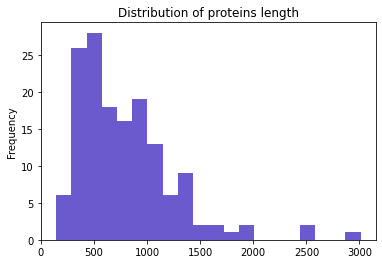

In [43]:
domains[['entry', 'length']].drop_duplicates().length.plot(kind= 'hist', bins= 20, color= 'slateblue')
plt.title("Distribution of proteins length")
plt.show()

---

In [ ]:
domains

,from,entry,entry_name,length,sequence,domain
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"DOMAIN 16..109; /note=""DMAP1-binding""; /eviden..."
1,P20226,P20226,TBP_HUMAN,339,MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNT...,NaN
2,Q62073,Q62073,M3K7_MOUSE,579,MSTASAASSSSSSSASEMIEAPSQVLNFEEIDYKEIEVEEVVGRGA...,"DOMAIN 36..291; /note=""Protein kinase""; /evide..."
3,P06782,P06782,SNF1_YEAST,633,MSSNNNTNTAPANANSSHHHHHHHHHHHHHGHGGSNSTLNNPKSSL...,"DOMAIN 55..306; /note=""Protein kinase""; /evide..."
4,P10644,P10644,KAP0_HUMAN,381,MESGSTAASEEARSLRECELYVQKHNIQALLKDSIVQLCTARPERP...,NaN
...,...,...,...,...,...,...
146,Q3UP24,Q3UP24,NLRC4_MOUSE,1024,MNFIRNNRRALIQRMGLTVTKQICDDLFALNVLNNQEANVIYCEPL...,"DOMAIN 1..88; /note=""CARD""; /evidence=""ECO:000..."
147,Q9JK66,Q9JK66,PRKN_RAT,465,MIVFVRFNSSYGFPVEVDSDTSIFQLKEVVAKRQGVPADQLRVIFA...,"DOMAIN 1..76; /note=""Ubiquitin-like""; /evidenc..."
148,Q15691,Q15691,MARE1_HUMAN,268,MAVNVYSTSVTSDNLSRHDMLAWINESLQLNLTKIEQLCSGAAYCQ...,"DOMAIN 14..116; /note=""Calponin-homology (CH)""..."
149,P04521,P04521,EXO1_BPT4,339,MKILNLGDWHLGVKADDEWIRGIQIDGIKQAIEYSKKNGITTWIQY...,NaN


In [ ]:
domains.domain = domains.domain.str.split(";")

In [ ]:
df = domains.explode("domain")
df

,from,entry,entry_name,length,sequence,domain
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,DOMAIN 16..109
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"/note=""DMAP1-binding"""
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"/evidence=""ECO:0000255|PROSITE-ProRule:PRU01260"""
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,DOMAIN 758..884
0,P13864,P13864,DNMT1_MOUSE,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...,"/note=""BAH 1"""
...,...,...,...,...,...,...
150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,"/note=""Protein kinase"""
150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,"/evidence=""ECO:0000255|PROSITE-ProRule:PRU00159"""
150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,DOMAIN 523..594
150,P41743,P41743,KPCI_HUMAN,596,MPTQRDSSTMSHTVAGGGSGDHSHQVRVKAYYRGDIMITHFEPSIS...,"/note=""AGC-kinase C-terminal"""


---

In [ ]:
uniprots = cre_dataset.uniprot_acc.unique().tolist()

In [ ]:
# open file in write mode
with open('../datasets/uniprots_list.txt', 'w') as f:
    for item in uniprots:
        # write each item on a new line
        f.write("%s, " % item)
    print('Done')

Done


# Select the CREs regions

In [ ]:
# from Bio import SeqIO

# with open('../raw_data/uniprot-sequences-2022.09.09-07.56.11.43.fasta') as handle:
#     for record in SeqIO.parse(handle, "fasta"):
#         print(record.id)

In [15]:
df = domains[['entry', 'length', 'sequence']].copy()
df.rename(columns= {'entry': 'uniprot_acc'}, inplace= True)

In [19]:
cre_dataset = cre_dataset.merge(df, how= 'left')

,name,uniprot_acc,species,references,module,start_aa,end_aa,dataset,id_cre,length,sequence
0,DNMT1,P13864,M. musculus,"(Song et al., 2011; Trudeau et al., 2013)",d,699,733,train,1,1620,MPARTAPARVPALASPAGSLPDHVRRRLKDLERDGLTEKECVREKL...
1,TBP,P20226,H. sapiens,"(Kuddus and Schmidt, 1993; Trudeau et al., 2013)",d,1,55,train,2,339,MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNT...
2,TAK1,Q62073,M. musculus,"(Yamaguchi et al., 1995)",d,1,22,train,3,579,MSTASAASSSSSSSASEMIEAPSQVLNFEEIDYKEIEVEEVVGRGA...
3,SNF1,P06782,S. crevisiae,"(Jiang and Carlson, 1997; Trudeau et al., 2013)",d,392,495,train,4,633,MSSNNNTNTAPANANSSHHHHHHHHHHHHHGHGGSNSTLNNPKSSL...
4,TSE1,P10644,H. sapiens,"(Francis et al., 2002)",d,1,98,train,5,381,MESGSTAASEEARSLRECELYVQKHNIQALLKDSIVQLCTARPERP...
...,...,...,...,...,...,...,...,...,...,...,...
163,NLRC4,Q3UP24,M. musculus,"(Hu et al., 2013)",s,299,355,test,164,1024,MNFIRNNRRALIQRMGLTVTKQICDDLFALNVLNNQEANVIYCEPL...
164,Park2,Q9JK66,R. norvegicus,"(Byrd and Weissman, 2013)",s,410,465,test,165,465,MIVFVRFNSSYGFPVEVDSDTSIFQLKEVVAKRQGVPADQLRVIFA...
165,EB1,Q15691,H. sapiens,"(Kanaba et al., 2013)",s,189,268,test,166,268,MAVNVYSTSVTSDNLSRHDMLAWINESLQLNLTKIEQLCSGAAYCQ...
166,gp47,P04521,Enterobacteria phage T4,"(Gao and Nelson, 2014)",s,303,320,test,167,339,MKILNLGDWHLGVKADDEWIRGIQIDGIKQAIEYSKKNGITTWIQY...


In [29]:
cre_dataset.sort_values('start_aa').head()

,name,uniprot_acc,species,references,module,start_aa,end_aa,dataset,id_cre,length,sequence
20,Syntaxin-1A,P32851,R. norvegicus,"(Chen and Scheller, 2001; Misura et al., 2000;...",d,1,161,train,21,288,MKDRTQELRTAKDSDDDDDVTVTVDRDRFMDEFFEQVEEIRGFIDK...
50,ARHGAP1,Q07960,H. sapiens,"(Moskwa et al., 2005)",d,1,48,train,51,439,MDPLSELQDDLTLDDTSEALNQLKLASIDEKNWPSDEMPDFPKSDD...
55,PAK4,O96013,H. sapiens,"(Ha et al., 2012)",d,1,130,train,56,591,MFGKRKKRVEISAPSNFEHRVHTGFDQHEQKFTGLPRQWQSLIEES...
58,FoxM1,Q08050,H. sapiens,"(Laoukili et al., 2008)",d,1,235,train,59,763,MKTSPRRPLILKRRRLPLPVQNAPSETSEEEPKRSPAQQESNQAEA...
33,TFCIIIC-131,P33339,S. cerevisiae,"(Moir et al., 2002; Trudeau et al., 2013)",d,1,117,train,34,1025,MAAGKLKKEQQNQSAERESADTGKVNDEDEEHLYGNIDDYKHLIQD...


In [33]:
cre_dataset.sequence[20][cre_dataset.start_aa[20]-1 : cre_dataset.end_aa[20]]

'MKDRTQELRTAKDSDDDDDVTVTVDRDRFMDEFFEQVEEIRGFIDKIAENVEEVKRKHSAILASPNPDEKTKEELEELMSDIKKTANKVRSKLKSIEQSIEQEEGLNRSSADLRIRKTQHSTLSRKFVEVMSEYNATQSDYRERCKGRIQRQLEITGRTTT'

In [32]:
cre_dataset.end_aa[20] - cre_dataset.start_aa[20] + 1

161

In [34]:
len('MKDRTQELRTAKDSDDDDDVTVTVDRDRFMDEFFEQVEEIRGFIDKIAENVEEVKRKHSAILASPNPDEKTKEELEELMSDIKKTANKVRSKLKSIEQSIEQEEGLNRSSADLRIRKTQHSTLSRKFVEVMSEYNATQSDYRERCKGRIQRQLEITGRTTT')

161

In [39]:
cre_dataset["cre_sequence"] = None
cre_dataset["cre_length"] = None
for i in cre_dataset.index:
    seq = cre_dataset.sequence[i][cre_dataset.start_aa[i]-1 : cre_dataset.end_aa[i]]
    cre_dataset["cre_sequence"][i] = seq
    cre_dataset["cre_length"][i] = len(seq)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
cre_dataset[['uniprot_acc', 'cre_sequence']]

,uniprot_acc,cre_sequence
0,P13864,VKEADDDEEADDDVSEMPSPKKLHQGKKKKQNKDR
1,P20226,MDQNNSLPPYAQGLASPQGAMTPGIPIFSPMMPYGTGLTPQPIQNT...
2,Q62073,MSTASAASSSSSSSASEMIEAP
3,P06782,LIKDMKANKSVSDELDTFLSQSPPTFQQQSKSHQKSQVDHETAKQH...
4,P10644,MESGSTAASEEARSLRECELYVQKHNIQALLKDSIVQLCTARPERP...
...,...,...
163,Q3UP24,DMTEDSAKDLIEAVLVPDQVERLWAQIQESRCLRNLMKTPLFVVIT...
164,Q9JK66,TIKKTTKPCPRCNVPIEKNGGCMHMKCPQPQCKLEWCWNCGCEWNR...
165,Q15691,GDDEAAELMQQVNVLKLTVEDLEKERDFYFGKLRNIELICQENEGE...
166,P04521,SLQTLMEEYINAIPDITD


In [55]:
cre_dataset[['uniprot_acc', 'id_cre']]

,uniprot_acc,id_cre
0,P13864,1
1,P20226,2
2,Q62073,3
3,P06782,4
4,P10644,5
...,...,...
163,Q3UP24,164
164,Q9JK66,165
165,Q15691,166
166,P04521,167


In [63]:
list_seq = cre_dataset.cre_sequence.to_list()
list_uniprot = cre_dataset.uniprot_acc.to_list()

In [57]:
id_cre = cre_dataset.id_cre.to_list()

In [74]:
list_name = []
for i in zip(list_uniprot, id_cre):
    name = i[0] + "-" + str(i[1])
    list_name.append(name)

In [75]:
list_name

['P13864-1',
 'P20226-2',
 'Q62073-3',
 'P06782-4',
 'P10644-5',
 'P15498-6',
 'Q63450-7',
 'P00523-8',
 'P00523-9',
 'P10105-10',
 'P28829-11',
 'P45442-12',
 'P49674-13',
 'Q93107-14',
 'C8ZE58-15',
 'O76360-16',
 'P63328-17',
 'O88933-18',
 'O94532-19',
 'P26038-20',
 'P32851-21',
 'P42768-22',
 'P42768-23',
 'Q13153-24',
 'Q60591-25',
 'Q60437-26',
 'Q60437-27',
 'Q5VT25-28',
 'P52293-29',
 'Q6FI27-30',
 'Q9PUQ1-31',
 'Q9PUQ1-32',
 'Q9PUQ1-33',
 'P33339-34',
 'P33339-35',
 'P06401-36',
 'P11308-37',
 'P27577-38',
 'P27577-39',
 'P27577-40',
 'P31323-41',
 'P31751-42',
 'A8KAM8-43',
 'P15336-44',
 'P19419-45',
 'P28324-46',
 'P28324-47',
 'P41971-48',
 'P43403-49',
 'P43403-50',
 'Q07960-51',
 'Q07960-52',
 'Q9H2X6-53',
 'O08967-54',
 'O08967-55',
 'O96013-56',
 'Q9NR80-57',
 'P35968-58',
 'Q08050-59',
 'Q8VDP3-60',
 'P17948-61',
 'P35916-62',
 'Q00722-63',
 'Q13625-64',
 'Q9Y613-65',
 'O14974-66',
 'Q8NQJ3-67',
 'Q8Y842-68',
 'P97360-69',
 'Q08499-70',
 'Q08499-71',
 'O08808-72',
 

In [76]:
# Write the CRE sequences to a fasta file
output_file = open("../datasets/cre_fasta.fasta", "w")

for i in range(len(list_seq)):
    output_file.write(">" + list_name[i] + "\n" +list_seq[i] + "\n")

#do not forget to close it

output_file.close()

In [48]:
from Bio import SeqIO

In [49]:
dir(SeqIO)

['AbiIO',
 'AceIO',
 'FastaIO',
 'GckIO',
 'IgIO',
 'InsdcIO',
 'Interfaces',
 'MultipleSeqAlignment',
 'NibIO',
 'PdbIO',
 'PhdIO',
 'PirIO',
 'QualityIO',
 'SeqRecord',
 'SeqXmlIO',
 'SffIO',
 'SnapGeneIO',
 'SwissIO',
 'TabIO',
 'TwoBitIO',
 'UniprotIO',
 'XdnaIO',
 '_FormatToIterator',
 '_FormatToString',
 '_FormatToWriter',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_converter',
 '_twoBitIO',
 'as_handle',
 'convert',
 'index',
 'index_db',
 'parse',
 'read',
 'to_dict',
 'write']